# Title

### Why do we need an intro.jpg

In [1]:
import numpy as np
import matplotlib.pyplot as plt

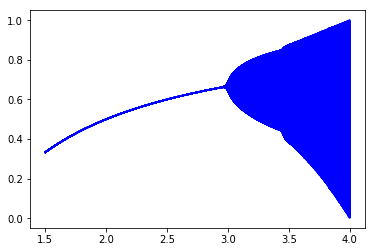

In [34]:
#This function returns the population growth function for a given "a" value
def getPopFunction(a):
    return lambda n : a * n * (1 - n)

#Determine the convergence of a certain population function after an arbitrary number of iterations:

def getConvergence(initial, popFunction, iterations):
    for i in range(0,iterations):
        initial = popFunction(initial)
    return initial

#Initialize a population with a random size, and iterate with a = 1 to find the convergence (with 100 iterations)

def randomCurve(a, iterations):
    return [a, getConvergence(np.random.random(),getPopFunction(a), iterations)]

#Obtain an array of 50 such values

results = [randomCurve(1,100) for i in range(0,50)]
#print(results)

#now, do the same but iterating through 2000 values of a in [1.5,4]
aSweep = [[randomCurve(a,100) for i in range(0,50)] for a in np.linspace(1.5,4,2000)]

ax = plt.subplot(111)
ax.plot([[j[0] for j in i] for i in aSweep], [[j[1] for j in i] for i in aSweep],'b')
plt.show()

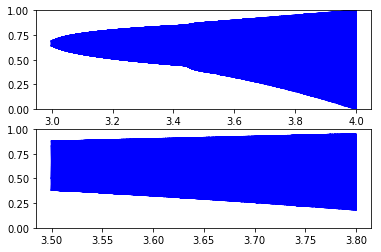

In [39]:
#Same as above, but for a in [3,4] and [3.5,3.8]
aSweep = [[randomCurve(a,100) for i in range(0,50)] for a in np.linspace(3,4,2000)]

ax1 = plt.subplot(211)
ax1.set_ylim(0,1)
ax1.plot([[j[0] for j in i] for i in aSweep], [[j[1] for j in i] for i in aSweep],'b')

aSweep = [[randomCurve(a,100) for i in range(0,50)] for a in np.linspace(3.5,3.8,2000)]

ax2 = plt.subplot(212)
ax2.set_ylim(0,1)
ax2.plot([[j[0] for j in i] for i in aSweep], [[j[1] for j in i] for i in aSweep],'b')

plt.show()

### Part 2 - montecarlo integration

In [52]:
def montecarloIntegrate(function, bounds):
    #First thing we need to do is find the bounding box of the function - we know that sin^4 is bounded by [0,1], but
    #arbitrarily choosing these values is not very generalizable (also it's cheating -_-)
    
    testSeq = [function(i) for i in np.linspace(bounds[0], bounds[1], 200)]
    
    #find the global maxima and minima of the function
    gMax = np.amax(testSeq)
    gMin = np.amin(testSeq)
    diff = gMax - gMin

    # now we have the vertical bounds - we just need to create a bunch of random points in the area and check whether
    #they are smaller than the function
    
    #However, to do this
    
    iterations = 100
    numInside = 0.0
    
    ax1 = plt.subplot(111)
    
    for x,y in zip(np.random.random(iterations) * (bounds[1] - bounds[0]) + bounds[0], np.random.random(iterations) * diff + gMax):
        value = function(x)            
        #Firstly, the point must have the same sign as the function to be under the curve:
        if (value * y >= 0):
            # if it has the same sign, check whether it is under the curve
            if (np.abs(value) < np.abs(y)):
                #Now, if the value is negative, subtract a point from the total. Else, add a point
                if value < 0:
                    numInside -= 1
                else:
                    numInside += 1
            else:
                ax1.plot(x,y,)
    
    # Now, find ratio of points inside and outside the bounds, and multiply by total area:
    
    return numInside / iterations * diff * (bounds[1] - bounds[0])

montecarloIntegrate(lambda x : np.sin(x) ** 4, [0.0, 0.5 * np.pi])

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0


1.5707963267948966